In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('Student_drop_out_system.csv')

In [3]:
df.shape

(250, 28)

In [4]:
df.head()

,Age,Gender,Home Language,Father Occupation,Mother Occupation,Number Of Siblings,Father Education,Mother Education,School Distance,Means to school,...,Math,Science,History,Social Science,Religious Study,Family Annual income,Extra Tution,Hours of study per day,Class Label,GPA
0,13-15 years,female,Native Language,Immigrant,Home maker,Four or more,secondary,secondary,1-2 km,Rickshaw,...,35,42,35,25,29,300000,Yes,1 hours,Yes,2.01
1,10-13 years,male,Bangla,Freelancer,Home maker,Three Children,Honors/ Equivalent,secondary,0.5-1 km,Bicycle/motorbike,...,47,50,54,56,91,850000,Yes,3 hours,No,3.04
2,13-15 years,female,Native Language,Private sector,Home maker,Three Children,primary,secondary,>7 km,Rickshaw,...,81,90,43,81,31,100000,No,3 hours,No,3.08
3,13-15 years,female,Bangla,Public sector,Freelancer,Three Children,primary,secondary,0-0.5 km,Walk,...,83,54,50,20,82,200000,Yes,1 hours,Yes,2.40
4,10-13 years,male,Native Language,Public sector,Home maker,None,Honors/ Equivalent,primary,1-2 km,Walk,...,52,32,33,28,81,150000,No,1 hours,Yes,2.19


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     250 non-null    object 
 1   Gender                  250 non-null    object 
 2   Home Language           250 non-null    object 
 3   Father Occupation       250 non-null    object 
 4   Mother Occupation       250 non-null    object 
 5   Number Of Siblings      250 non-null    object 
 6   Father Education        250 non-null    object 
 7   Mother Education        250 non-null    object 
 8   School Distance         250 non-null    object 
 9   Means to school         250 non-null    object 
 10  House Lighting          250 non-null    object 
 11  School Infrustructure   250 non-null    object 
 12  School Meal per day     250 non-null    object 
 13  School Cost             250 non-null    object 
 14  Family income source    250 non-null    ob

In [8]:
# df.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1,inplace=True)
df.drop('Unnamed: 15',axis=1,inplace=True)

KeyError: "['Unnamed: 15'] not found in axis"

In [10]:
df.columns

Index(['Age', 'Gender', 'Home Language', 'Father Occupation',
       'Mother Occupation', 'Number Of Siblings', 'Father Education',
       'Mother Education', 'School Distance', 'Means to school',
       'House Lighting', 'School Infrustructure', 'School Meal per day',
       'School Cost', 'Family income source', 'Bangla', 'English', 'Math',
       'Science', 'History', 'Social Science', 'Religious Study',
       'Family Annual income', 'Extra Tution', 'Hours of study per day',
       'Class Label', 'GPA'],
      dtype='object')

In [11]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [12]:

for col in df.columns:
    if df[col].dtype==np.number:
        continue
    else:
        df[col]=le.fit_transform(df[col])

In [13]:
df.head()

,Age,Gender,Home Language,Father Occupation,Mother Occupation,Number Of Siblings,Father Education,Mother Education,School Distance,Means to school,...,Math,Science,History,Social Science,Religious Study,Family Annual income,Extra Tution,Hours of study per day,Class Label,GPA
0,1,0,2,3,3,0,4,4,2,2,...,15,21,15,5,9,5,1,1,1,2.01
1,0,1,0,2,3,2,0,4,1,0,...,27,29,34,35,69,16,1,3,0,3.04
2,1,0,2,4,3,2,3,4,6,2,...,61,69,23,60,11,0,0,3,0,3.08
3,1,0,0,5,2,2,3,4,0,4,...,63,33,30,0,61,3,1,1,1,2.40
4,0,1,2,5,3,1,0,3,2,4,...,32,11,13,8,60,1,0,1,1,2.19


In [14]:
x=df.drop('Class Label',axis=1)
y=df['Class Label']

In [15]:

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.2,random_state=45)

In [16]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=1000)


In [17]:
rfc.fit(xtrain,ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [18]:
rfc.score(xtest,ytest)

0.98

In [19]:
rfc.feature_importances_

array([0.00525324, 0.001784  , 0.00290826, 0.00641281, 0.00437447,
       0.00483243, 0.00385083, 0.00327196, 0.00746947, 0.00555268,
       0.00300848, 0.00490942, 0.00174282, 0.00310941, 0.003955  ,
       0.02502852, 0.02686887, 0.02969991, 0.04255505, 0.030973  ,
       0.02224611, 0.03658354, 0.07203445, 0.02697783, 0.23497586,
       0.38962158])

In [20]:
pred=rfc.predict(xtest)

In [21]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest,pred)

array([[32,  0],
       [ 1, 17]], dtype=int64)

In [22]:
from sklearn.metrics import classification_report
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        32
           1       1.00      0.94      0.97        18

    accuracy                           0.98        50
   macro avg       0.98      0.97      0.98        50
weighted avg       0.98      0.98      0.98        50



# Roc Auc carve

In [32]:
from sklearn.metrics import auc,classification_report,accuracy_score,roc_curve,roc_auc_score,precision_recall_curve

In [24]:
rf_auc=roc_auc_score(ytest,pred)

In [25]:
print(rf_auc)

0.9722222222222222


In [26]:
rf_fpr,rf_tpr,_=roc_curve(ytest,pred)

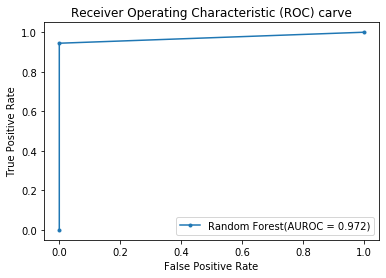

In [27]:
plt.plot(rf_fpr,rf_tpr,marker='.',label='Random Forest(AUROC = %0.3f)'%rf_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) carve')
plt.legend()
plt.show()

In [35]:
p,r,t=precision_recall_curve(ytest,pred)

Text(0, 0.5, 'Recall')

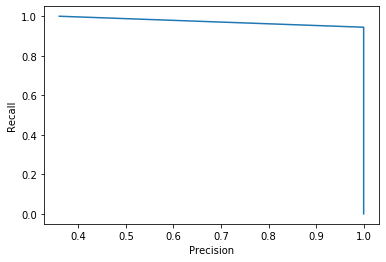

In [39]:
plt.plot(p,r,)
plt.xlabel('Precision')
plt.ylabel('Recall')